In [1]:
#to use any of the third-party modules, we have to first import them in our current workspace.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import  cross_val_score
%matplotlib inline


/home/harsh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/harsh/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#titanic data has been provided in two csv files. train data includes survived coloumn
#whereas test doesn't. Here we are loading them respectively in seperate dataframes.
train_set=pd.read_csv('train.csv')
test_set=pd.read_csv('test.csv')


In [3]:
#joining the dataset to get the same number of features during the categorical conversion in the future
train_len=len(train_set)
dataset=pd.concat(objs=[train_set,test_set],axis=0).reset_index(drop=True)

In [4]:
#Since we will be merging train and test data and then start modifying it soon, So we are taking out 
#passenger_id which we will require at the end while genrating submission file.
IDtest = test_set["PassengerId"]

In [5]:
#The first step is to fill the missing values in any dataframe.
dataset.fillna(np.nan)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [6]:
#figuring out how many NULL values are there in our DataFrame
dataset.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [7]:
#with the above command we came to know that 'Embarked' has 2 null values of which we have to take care.
dataset['Embarked']=dataset['Embarked'].fillna('S')

In [8]:
#To get the best result it is recommended that we should convert all the categorical columns into integer.
#we will be converting all the categorical features in this dataframe.
dataset['Sex']=dataset["Sex"].map({"male":0,"female":1})

In [9]:
#Age ccoloumn also has the many NULL values which we are filling with the mean of age, 
#considering which class does passenger belongs to.
def imput_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
dataset['Age']=dataset[['Age','Pclass']].apply(imput_age,axis=1)

In [11]:
dataset_title=[i.split(",")[1].split(".")[0].strip() for i in dataset['Name']]

In [12]:
dataset["Title"]=pd.Series(dataset_title)

In [13]:
dataset["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
the Countess      1
Don               1
Dona              1
Mme               1
Capt              1
Sir               1
Lady              1
Name: Title, dtype: int64

In [14]:
dataset["Title"]=dataset["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [15]:
dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})

In [11]:
dataset.drop(labels=["Name"],axis=1,inplace=True)

In [12]:
dataset["Fize"]=dataset["SibSp"]+dataset["Parch"]+1

In [13]:
dataset["Single"]=dataset["Fize"].map(lambda s: 1 if s==1 else 0)
dataset["SmallF"]=dataset["Fize"].map(lambda s: 1 if s==2 else 0)
dataset["MedF"]=dataset["Fize"].map(lambda s: 1 if 3<=s else 0)
dataset["LargeF"]=dataset["Fize"].map(lambda s: 1 if s>=5 else 0)

In [29]:

dataset=pd.get_dummies(dataset,columns=["Embarked"],prefix="Em")

In [20]:
dataset["Cabin"].isnull().sum()

1014

In [21]:
dataset["Cabin"].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [22]:
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

In [23]:
dataset=pd.get_dummies(dataset,columns=["Cabin"],prefix="Cabin")

In [24]:
dataset["Ticket"]

0                A/5 21171
1                 PC 17599
2         STON/O2. 3101282
3                   113803
4                   373450
5                   330877
6                    17463
7                   349909
8                   347742
9                   237736
10                 PP 9549
11                  113783
12               A/5. 2151
13                  347082
14                  350406
15                  248706
16                  382652
17                  244373
18                  345763
19                    2649
20                  239865
21                  248698
22                  330923
23                  113788
24                  349909
25                  347077
26                    2631
27                   19950
28                  330959
29                  349216
               ...        
1279                364858
1280                349909
1281                 12749
1282              PC 17592
1283             C.A. 2673
1284            C.A. 30769
1

In [25]:
Ticket=[]
for i in list(dataset.Ticket):
    if not i.isdigit():
        Ticket.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        Ticket.append('X')

In [26]:
dataset["Ticket"]=Ticket

In [27]:
dataset["Ticket"].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket, dtype: object

In [28]:
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")

In [14]:
dataset.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fize,Single,SmallF,MedF,LargeF
0,22.0,NaN,S,7.2500,0,1,3,0,1,0.0,A/5 21171,2,0,1,0,0
1,38.0,C85,C,71.2833,0,2,1,1,1,1.0,PC 17599,2,0,1,0,0
2,26.0,NaN,S,7.9250,0,3,3,1,0,1.0,STON/O2. 3101282,1,1,0,0,0
3,35.0,C123,S,53.1000,0,4,1,1,1,1.0,113803,2,0,1,0,0
4,35.0,NaN,S,8.0500,0,5,3,0,0,0.0,373450,1,1,0,0,0


In [15]:
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

In [16]:
dataset.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Fize,Single,SmallF,MedF,LargeF
0,22.0,NaN,S,1.981001,0,1,3,0,1,0.0,A/5 21171,2,0,1,0,0
1,38.0,C85,C,4.266662,0,2,1,1,1,1.0,PC 17599,2,0,1,0,0
2,26.0,NaN,S,2.070022,0,3,3,1,0,1.0,STON/O2. 3101282,1,1,0,0,0
3,35.0,C123,S,3.972177,0,4,1,1,1,1.0,113803,2,0,1,0,0
4,35.0,NaN,S,2.085672,0,5,3,0,0,0.0,373450,1,1,0,0,0


In [17]:
dataset.drop(labels=['SibSp'],axis=1,inplace=True)

In [50]:
dataset.drop(labels=['Title_0','Title_1','Title_2','Title_3'],axis=1,inplace=True)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age         1309 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null float64
Pclass      1309 non-null int64
Sex         1309 non-null int64
Survived    891 non-null float64
Fize        1309 non-null int64
Single      1309 non-null int64
SmallF      1309 non-null int64
MedF        1309 non-null int64
LargeF      1309 non-null int64
dtypes: float64(3), int64(7), object(1)
memory usage: 112.6+ KB


In [56]:
dataset.head()

,Age,Fare,Pclass,Sex,Survived,Fize,Single,Em_C,Em_Q,Em_S
0,22.0,1.981001,3,0,0.0,2,0,0,0,1
1,38.0,4.266662,1,1,1.0,2,0,1,0,0
2,26.0,2.070022,3,1,1.0,1,1,0,0,1
3,35.0,3.972177,1,1,1.0,2,0,0,0,1
4,35.0,2.085672,3,0,0.0,1,1,0,0,1


In [55]:
dataset.drop(labels=['SmallF','MedF','LargeF'],axis=1,inplace=True)

In [22]:
dataset.drop(labels=['Ticket'],axis=1,inplace=True)

In [196]:
dataset.drop(labels=['Age'],axis=1,inplace=True)

In [25]:
dataset.drop(labels=['PassengerId'],axis=1,inplace=True)

In [24]:
dataset.drop(labels=['Parch'],axis=1,inplace=True)

In [31]:
dataset.head()

,Age,Fare,Pclass,Sex,Survived,Fize,Single,SmallF,MedF,LargeF,Em_C,Em_Q,Em_S
0,22.0,1.981001,3,0,0.0,2,0,1,0,0,0,0,1
1,38.0,4.266662,1,1,1.0,2,0,1,0,0,1,0,0
2,26.0,2.070022,3,1,1.0,1,1,0,0,0,0,0,1
3,35.0,3.972177,1,1,1.0,2,0,1,0,0,0,0,1
4,35.0,2.085672,3,0,0.0,1,1,0,0,0,0,0,1


In [38]:
dataset.drop(labels=['Name'],axis=1,inplace=True)

In [56]:
dataset1=dataset.copy(deep=True)

In [30]:
dataset1.head()

NameError: name 'dataset1' is not defined

In [57]:
cor=dataset.corr()

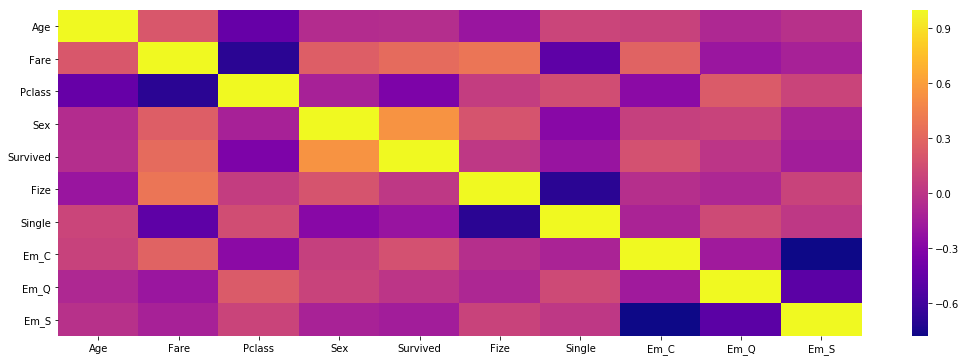

In [58]:
plt.figure(figsize=(18,6))
sns.heatmap(cor,cmap='plasma')

In [59]:
## Separate train dataset and test dataset

train = dataset[:train_len]
test = dataset[train_len:]
test.drop(labels=["Survived"],axis = 1,inplace=True)



/home/harsh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [66]:

train["Survived"] = train["Survived"].astype(int)

Y= train["Survived"]

X= train.drop(labels = ["Survived"],axis = 1)

/home/harsh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [240]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train)
X_test_minmax=min_max.fit_transform(X_test)

In [63]:
rfc.fit(X_train_minmax,y_train)

NameError: name 'rfc' is not defined

In [124]:
accuracy_score(y_test,rfc.predict(X_test_minmax))

0.77238805970149249

In [125]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

In [68]:
# Standardizing the train and test data
from sklearn.preprocessing import scale
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting logistic regression on our standardized data set
from sklearn.linear_model import LogisticRegression
log=RandomForestClassifier()
log.fit(X_train_scale,y_train)
# Checking the model's accuracy
accuracy_score(y_test,log.predict(X_test_scale))

0.77985074626865669

In [69]:
rfc_predictions1=log.predict(test)

In [70]:
rfc=RandomForestClassifier(n_estimators=400)

In [71]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
rfc_predictions1=rfc.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [73]:
print(accuracy_score(y_test,rfc_predictions1))

0.80223880597


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 65 columns):
Age            418 non-null float64
Fare           417 non-null float64
Parch          418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
SibSp          418 non-null int64
Fize           418 non-null int64
Single         418 non-null int64
SmallF         418 non-null int64
MedF           418 non-null int64
LargeF         418 non-null int64
Title_0        418 non-null uint8
Title_1        418 non-null uint8
Title_2        418 non-null uint8
Title_3        418 non-null uint8
Em_C           418 non-null uint8
Em_Q           418 non-null uint8
Em_S           418 non-null uint8
Cabin_A        418 non-null uint8
Cabin_B        418 non-null uint8
Cabin_C        418 non-null uint8
Cabin_D        418 non-null uint8
Cabin_E        418 non-null uint8
Cabin_F        418 non-null uint8
Cabin_G        418 non-null uint8
Cabi

In [74]:
rfc_predictions2=rfc.predict(test)

In [48]:
test.drop(labels=['Fare'],axis=1,inplace=True)

/home/harsh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
sub1=pd.DataFrame({
        "PassengerId":IDtest,
        "Survived":rfc_predictions2
        
    })
sub1.to_csv('sub1001monday.csv',header=True)

In [128]:
len(rfc_predictions1)

268

In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 64 columns):
Age            418 non-null float64
Parch          418 non-null int64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
SibSp          418 non-null int64
Fize           418 non-null int64
Single         418 non-null int64
SmallF         418 non-null int64
MedF           418 non-null int64
LargeF         418 non-null int64
Title_0        418 non-null uint8
Title_1        418 non-null uint8
Title_2        418 non-null uint8
Title_3        418 non-null uint8
Em_C           418 non-null uint8
Em_Q           418 non-null uint8
Em_S           418 non-null uint8
Cabin_A        418 non-null uint8
Cabin_B        418 non-null uint8
Cabin_C        418 non-null uint8
Cabin_D        418 non-null uint8
Cabin_E        418 non-null uint8
Cabin_F        418 non-null uint8
Cabin_G        418 non-null uint8
Cabin_T        418 non-null uint8
Cabin_

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predictions_knn=knn.predict(X_test)

In [78]:
print(accuracy_score(y_test,predictions_knn))

0.723880597015


In [134]:
knn_pred=knn.predict(test)

In [135]:
sub2=pd.DataFrame({
        "PassengerId":IDtest,
        "Survived":knn_pred
        
    })
sub2.to_csv('sub2.csv',header=False)

In [217]:
from sklearn.linear_model import LogisticRegression


In [79]:
# Standardizing the train and test data
from sklearn.preprocessing import scale
X_train_scale=scale(X_train)
X_test_scale=scale(X_test)
# Fitting logistic regression on our standardized data set
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,y_train)
# Checking the model's accuracy
accuracy_score(y_test,log.predict(X_test_scale))

0.77238805970149249

In [122]:
pred=log.predict(test)

In [80]:
logmodel=LogisticRegression()

In [81]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
predictions23=logmodel.predict(X_test)

In [228]:
predictions=logmodel.predict(test)

ValueError: X has 50 features per sample; expecting 49

In [83]:
print(accuracy_score(y_test,predictions23))

0.794776119403


In [123]:
subwithfare=pd.DataFrame({
        "PassengerId":IDtest,
        "Survived":pred
        
    })
subwithfare.to_csv('subwithfare102.csv',header=True)

In [99]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train)
X_test_minmax=min_max.fit_transform(X_test)

In [78]:
logmodel.fit(X_train_minmax,y_train)

NameError: name 'logmodel' is not defined

In [101]:
accuracy_score(y_test,logmodel.predict(X_test_minmax))

0.84328358208955223

In [77]:
predictions=logmodel.predict(test)

NameError: name 'logmodel' is not defined

In [45]:
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

/home/harsh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train,y_train)



In [81]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(y_train, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(X_train,y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(X_train,y_train)

In [83]:


output = model.predict(test).astype(int)

In [1]:
subwithrfc=pd.DataFrame({
        "PassengerId":IDtest,
        "Survived":output
        
    })
subwithrfc.to_csv('subwithrfc.csv',header=True)

NameError: name 'pd' is not defined

In [46]:
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics

/home/harsh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [63]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.78358208955223885

In [60]:
clfpred=clf_dt.predict(test)

NameError: name 'clf_dt' is not defined

In [42]:
subwithclf=pd.DataFrame({
        "PassengerId":IDtest,
        "Survived":clfpred
        
    })
subwithclf.to_csv('subwithclf.csv',header=True)

In [43]:
test.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Fize,Single,SmallF,...,T_W./C. 14258,T_W./C. 14260,T_W./C. 14263,T_W./C. 14266,T_W./C. 6607,T_W./C. 6608,T_W./C. 6609,T_W.E.P. 5734,T_W/C 14208,T_WE/P 5735
891,34.5,2.057860,0,892,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
892,47.0,1.945910,0,893,3,1,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
893,62.0,2.270836,0,894,2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
894,27.0,2.159003,0,895,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
895,22.0,2.508582,1,896,3,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
from sklearn.svm import SVC

In [62]:
model=SVC()

In [48]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
predictions=model.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(confusion_matrix(y_test,predictions))

[[155  12]
 [ 90  11]]


In [195]:
print(classification_report(y_test,predictions))

ValueError: Found input variables with inconsistent numbers of samples: [268, 418]

In [65]:
param_grid={'C':[0.001,0.01,0.1,1.0,10.0,100.0],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [68]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV]  C=0.001, gamma=1, kernel=rbf, score=0.6298076923076923, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV]  C=0.001, gamma=1, kernel=rbf, score=0.6298076923076923, total=   0.0s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV]  C=0.001, gamma=1, kernel=rbf, score=0.6280193236714976, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=0.6298076923076923, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.001, gamma=0.1, kernel=rbf, score=0.6298076923076923, total=   0.0s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV]  C=0.001, gamma=0.1, kernel=rbf, score=0.6280193236714976, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.6298076923076923, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.6298076923076923, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV]  C=0.001, gamma=0.01, kernel=rbf, score=0.6280193236714976, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.6298076923076923, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV]  C=0.001, gamma=0.001, kernel=rbf, score=0.6298076923076923, total=   0.0s
[CV] C=0.001, gamma=0

[CV]  C=10.0, gamma=1, kernel=rbf, score=0.6682692307692307, total=   0.0s
[CV] C=10.0, gamma=1, kernel=rbf .....................................
[CV]  C=10.0, gamma=1, kernel=rbf, score=0.6521739130434783, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV]  C=10.0, gamma=0.1, kernel=rbf, score=0.6730769230769231, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV]  C=10.0, gamma=0.1, kernel=rbf, score=0.7115384615384616, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV]  C=10.0, gamma=0.1, kernel=rbf, score=0.7246376811594203, total=   0.0s
[CV] C=10.0, gamma=0.01, kernel=rbf ..................................
[CV]  C=10.0, gamma=0.01, kernel=rbf, score=0.7884615384615384, total=   0.0s
[CV] C=10.0, gamma=0.01, kernel=rbf ..................................
[CV]  C=10.0, gamma=0.01, kernel=rbf, score=0.7403846153846154, total=   0.0s
[CV] C=10.0, gamma=0.01, kernel=rbf .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    3.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [69]:
grid.best_params_

{'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}

In [70]:
grid.best_estimator_

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
grid_predictions=grid.predict(X_test)

In [72]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.86      0.76      0.80       157
          1       0.71      0.82      0.76       111

avg / total       0.79      0.78      0.79       268



In [73]:
grid_predictions=grid.predict(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [63]:
subwithsvm=pd.DataFrame({
        "PassengerId":IDtest,
        "Survived":grid_predictions
        
    })
subwithsvm.to_csv('subwithsvm.csv',header=True)

In [43]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    a=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    cr=classification_report(y_test,y_pred)
    print(cm)
    print(cr)
    return a


In [44]:
a=model_evaluation(LogisticRegression())

[[152  16]
 [ 27  73]]
             precision    recall  f1-score   support

          0       0.85      0.90      0.88       168
          1       0.82      0.73      0.77       100

avg / total       0.84      0.84      0.84       268



In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder

In [46]:
params = {
    'polynomialfeatures__degree': [1, 2],
    'classification__penalty': ['l1', 'l2'],
    'classification__C': [1, 3, 6, 10]
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures()),
    ('classification', LogisticRegression())
])
    
grid = GridSearchCV(pipe, params, n_jobs=-1, cv=10, verbose=2)


In [47]:
grid.fit(X_train,y_train.ravel())

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 
[CV] classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 
[CV] classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 
[CV] classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 
[CV] classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 
[CV]  classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 -   0.0s
[CV]  classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 -   0.0s
[CV]  classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 -   0.0s
[CV] classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 
[CV]  classification__C=1, classification__penalty=l1, polynomialfeatures__degree=1 -   0.0s
[CV]  classification__C=1, classification__penalty=l1, polyno

[CV] classification__C=6, classification__penalty=l1, polynomialfeatures__degree=1 
[CV]  classification__C=6, classification__penalty=l2, polynomialfeatures__degree=2 -   0.1s
[CV]  classification__C=3, classification__penalty=l2, polynomialfeatures__degree=2 -   0.0s
[CV] classification__C=3, classification__penalty=l1, polynomialfeatures__degree=2 
[CV] classification__C=1, classification__penalty=l2, polynomialfeatures__degree=2 
[CV] classification__C=3, classification__penalty=l2, polynomialfeatures__degree=2 
[CV] classification__C=6, classification__penalty=l2, polynomialfeatures__degree=2 
[CV]  classification__C=6, classification__penalty=l1, polynomialfeatures__degree=1 -   0.0s
[CV] classification__C=6, classification__penalty=l1, polynomialfeatures__degree=1 
[CV]  classification__C=1, classification__penalty=l2, polynomialfeatures__degree=2 -   0.0s
[CV]  classification__C=6, classification__penalty=l1, polynomialfeatures__degree=1 -   0.0s
[CV]  classification__C=1, clas

[CV] classification__C=10, classification__penalty=l2, polynomialfeatures__degree=1 
[CV] classification__C=10, classification__penalty=l1, polynomialfeatures__degree=2 
[CV]  classification__C=10, classification__penalty=l2, polynomialfeatures__degree=1 -   0.0s
[CV] classification__C=10, classification__penalty=l2, polynomialfeatures__degree=1 
[CV]  classification__C=3, classification__penalty=l2, polynomialfeatures__degree=2 -   0.0s
[CV] classification__C=3, classification__penalty=l2, polynomialfeatures__degree=2 
[CV]  classification__C=10, classification__penalty=l2, polynomialfeatures__degree=1 -   0.0s
[CV]  classification__C=3, classification__penalty=l1, polynomialfeatures__degree=1 -   0.0s
[CV] classification__C=10, classification__penalty=l2, polynomialfeatures__degree=1 
[CV]  classification__C=10, classification__penalty=l2, polynomialfeatures__degree=1 -   0.0s
[CV]  classification__C=6, classification__penalty=l2, polynomialfeatures__degree=2 -   0.1s
[CV] classifica

[Parallel(n_jobs=-1)]: Done  64 out of 160 | elapsed:    0.9s remaining:    1.3s


[CV]  classification__C=10, classification__penalty=l2, polynomialfeatures__degree=2 -   0.0s
[CV] classification__C=10, classification__penalty=l2, polynomialfeatures__degree=2 
[CV]  classification__C=10, classification__penalty=l2, polynomialfeatures__degree=2 -   0.0s
[CV] classification__C=10, classification__penalty=l2, polynomialfeatures__degree=2 
[CV]  classification__C=6, classification__penalty=l1, polynomialfeatures__degree=2 -   0.1s
[CV] classification__C=6, classification__penalty=l1, polynomialfeatures__degree=2 
[CV]  classification__C=10, classification__penalty=l1, polynomialfeatures__degree=2 -   0.4s
[CV] classification__C=10, classification__penalty=l1, polynomialfeatures__degree=2 
[CV]  classification__C=10, classification__penalty=l2, polynomialfeatures__degree=2 -   0.1s
[CV] classification__C=10, classification__penalty=l2, polynomialfeatures__degree=2 
[CV]  classification__C=6, classification__penalty=l1, polynomialfeatures__degree=2 -   0.3s
[CV] classific

[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.6s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('classification', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'polynomialfeatures__degree': [1, 2], 'classification__penalty': ['l1', 'l2'], 'classification__C': [1, 3, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [48]:
grid.best_score_

0.8009630818619583

In [49]:
grid.best_params_

{'classification__C': 1,
 'classification__penalty': 'l1',
 'polynomialfeatures__degree': 1}

In [50]:
grid.score(X_test,y_test)

0.83955223880597019

In [51]:
lg=grid.best_estimator_

In [52]:
lg.fit(X_train, y_train.ravel())


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('classification', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [53]:
pred=lg.predict(test)

In [54]:
    sub1=pd.DataFrame({
        "PassengerId":IDtest,
        "Survived":pred
        
                    })
    sub1.to_csv('lr_monday1.csv',header=True)


In [243]:
def lr_pred():
    logmodel=LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions=logmodel.predict(test)
    sub1=pd.DataFrame({
        "PassengerId":IDtest,
        "Survived":predictions
        
                    })
    sub1.to_csv('lr_sunday102.csv',header=True)


In [244]:
lr_pred()

In [65]:
b=model_evaluation(RandomForestClassifier())

[[139  25]
 [ 28  76]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       164
          1       0.75      0.73      0.74       104

avg / total       0.80      0.80      0.80       268



In [47]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
c=model_evaluation(DecisionTreeClassifier())

[[141  23]
 [ 29  75]]
             precision    recall  f1-score   support

          0       0.83      0.86      0.84       164
          1       0.77      0.72      0.74       104

avg / total       0.80      0.81      0.80       268



In [67]:
lr=LogisticRegression()

In [68]:
params={'C':[0.001,0.01,0.1,1.0,0.0,10.0,100.0],
        'penalty':['11','12']
       }
gslr=GridSearchCV(lr,params,n_jobs=-1,cv=5)
gslr.fit(X_train,y_train)


NameError: name 'GridSearchCV' is not defined

In [84]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,200,250]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train,y_train )

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90, 120, 150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [85]:
pred=clf.predict(X_test)

In [86]:
print(accuracy_score(y_test,pred))

0.791044776119


In [41]:
predictions_of_DTwithGS=clf.predict(test)

In [42]:
sub1=pd.DataFrame({
        "PassengerId":IDtest,
        "Survived":predictions_of_DTwithGS
        
                    })
sub1.to_csv('DTwithGS_monday2.csv',header=True)


In [37]:
dataset.head()

,Age,Fare,Pclass,Sex,Survived,Fize,Single,SmallF,MedF,LargeF,Em_C,Em_Q,Em_S
0,22.0,1.981001,3,0,0.0,2,0,1,0,0,0,0,1
1,38.0,4.266662,1,1,1.0,2,0,1,0,0,1,0,0
2,26.0,2.070022,3,1,1.0,1,1,0,0,0,0,0,1
3,35.0,3.972177,1,1,1.0,2,0,1,0,0,0,0,1
4,35.0,2.085672,3,0,0.0,1,1,0,0,0,0,0,1
